In [2]:
# TOOLS PREPARATION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Loading the dataset
movie = pd.read_csv('IMDb Movies India.csv.csv')
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movie.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
# checking for the missing values
movie.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
# movie['Year'] = movie['Year'].fillna(movie['Year'].mean())
# movie['Duration'] = movie['Duration'].fillna(movie['Duration'].mean())
# movie['Genre'] = movie['Genre'].fillna(movie['Genre'].mean())
# movie['Rating'] = movie['Rating'].fillna(movie['Rating'].mean())
# movie['Votes'] = movie['Votes'].fillna(movie['Votes'].mean())
# movie['Director'] = movie['Director'].fillna(movie['Director'].mean())
# movie['Actor 1'] = movie['Actor 1'].fillna(movie['Actor 1'].mean())
# movie['Actor 2'] = movie['Actor 2'].fillna(movie['Actor 2'].mean())
# movie['Actor 3'] = movie['Actor 3'].fillna(movie['Actor 3'].mean())

In [8]:
# checking for the datatype because we dont want str datatype
movie.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

movie['Year'] = Encoder.fit_transform(movie['Year'])
movie['Duration'] = Encoder.fit_transform(movie['Duration'])
movie['Genre'] = Encoder.fit_transform(movie['Genre'])
movie['Rating'] = Encoder.fit_transform(movie['Rating'])
movie['Votes'] = Encoder.fit_transform(movie['Votes'])
movie['Director'] = Encoder.fit_transform(movie['Director'])
movie['Name'] = Encoder.fit_transform(movie['Name'])
movie['Actor 1'] = Encoder.fit_transform(movie['Actor 1'])
movie['Actor 2'] = Encoder.fit_transform(movie['Actor 2'])
movie['Actor 3'] = Encoder.fit_transform(movie['Actor 3'])

In [10]:
movie.dtypes

Name        int32
Year        int32
Duration    int32
Genre       int32
Rating      int64
Votes       int32
Director    int32
Actor 1     int32
Actor 2     int32
Actor 3     int32
dtype: object

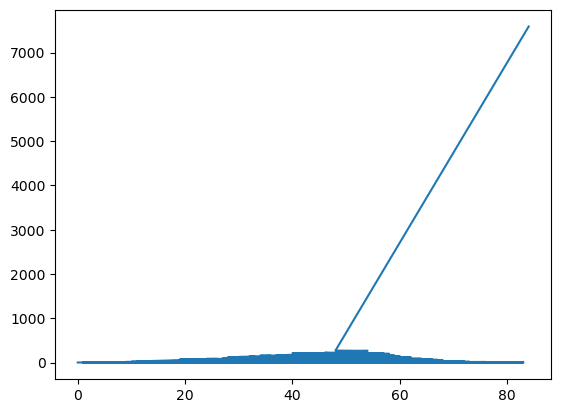

In [11]:
plt.plot(movie['Rating'].value_counts())

<Axes: xlabel='Rating'>

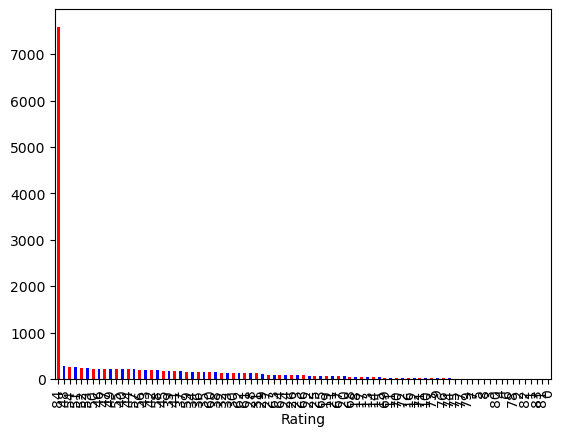

In [12]:
movie['Rating'].value_counts().plot(kind= 'bar', color = ['red','blue'])

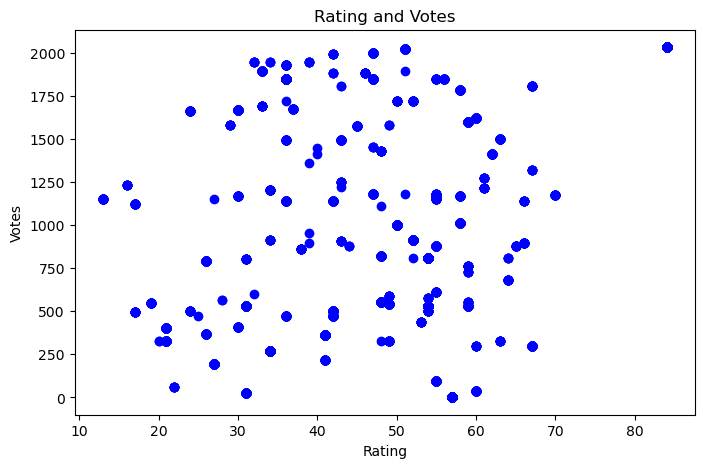

In [29]:
# Finding Patterns in Data using the Scatter Plot
plt.figure(figsize = (8,5))

# Creating Scatter Plot
plt.scatter(movie.Rating[movie.Duration],movie.Votes[movie.Duration],
           c = ["blue"])
plt.title('Rating and Votes');
plt.xlabel('Rating');
plt.ylabel('Votes');

<Axes: ylabel='Frequency'>

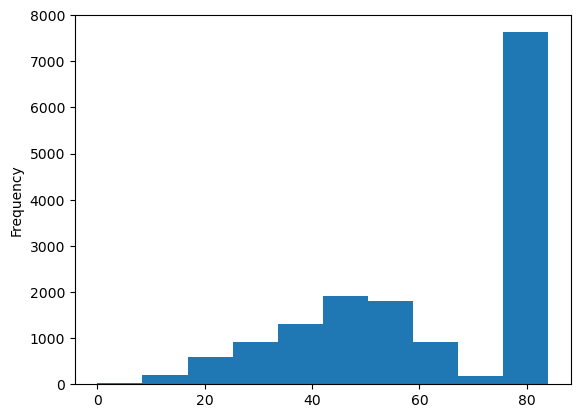

In [13]:
movie.Rating.plot.hist()

In [14]:
movie.dtypes

Name        int32
Year        int32
Duration    int32
Genre       int32
Rating      int64
Votes       int32
Director    int32
Actor 1     int32
Actor 2     int32
Actor 3     int32
dtype: object

In [15]:
movie.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Modelling

In [21]:
# importing sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
np.random.seed(7)
# Splitting data into X and y
X = movie.drop('Rating', axis = 1)
y = movie['Rating']
np.random.seed(7)
# Splitting the data into test and train
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

# Creating the instance
lr = LogisticRegression()

# Fitting the model
lr.fit(X, y)

C:\Users\bilal\ml_project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
lr.score(X_train, y_train)

0.4955267187877811

# 49% score is very less so lets try with another suitable model to achieve high score

In [25]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(7)
# Splitting data into X and y
X = movie.drop('Rating', axis = 1)
y = movie['Rating']
np.random.seed(7)
# Splitting the data into test and train
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

# Creating the instance
reg = RandomForestRegressor()

# Fitting the model
reg.fit(X, y)

RandomForestRegressor()

In [26]:
reg.score(X_train, y_train)

0.9782145579808964

In [27]:
reg.score(X_test,y_test)

0.9786948179700289

In [28]:
reg.predict(X_test)

array([34.77, 52.6 , 42.16, ..., 84.  , 84.  , 84.  ])

# We have achieved 97% score with RandomForestRegression Model